In [1]:
# SciPy is based on Numpy
# SciPy contains fully-featured versions of mathemetical and scientific functions

In [29]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('notebook')
import warnings
warnings.filterwarnings('ignore')

In [12]:
help(stats)

Help on package scipy.stats in scipy:

NAME
    scipy.stats - .. _statsrefmanual:

DESCRIPTION
    Statistical functions (:mod:`scipy.stats`)
    
    .. currentmodule:: scipy.stats
    
    This module contains a large number of probability distributions as
    well as a growing library of statistical functions.
    
    Each univariate distribution is an instance of a subclass of `rv_continuous`
    (`rv_discrete` for discrete distributions):
    
    .. autosummary::
       :toctree: generated/
    
       rv_continuous
       rv_discrete
       rv_histogram
    
    Continuous distributions
    
    .. autosummary::
       :toctree: generated/
    
       alpha             -- Alpha
       anglit            -- Anglit
       arcsine           -- Arcsine
       argus             -- Argus
       beta              -- Beta
       betaprime         -- Beta Prime
       bradford          -- Bradford
       burr              -- Burr (Type III)
       burr12            -- Burr (Type XII)
   

In [13]:
import scipy
scipy.info(stats)

.. _statsrefmanual:

Statistical functions (:mod:`scipy.stats`)

.. currentmodule:: scipy.stats

This module contains a large number of probability distributions as
well as a growing library of statistical functions.

Each univariate distribution is an instance of a subclass of `rv_continuous`
(`rv_discrete` for discrete distributions):

.. autosummary::
   :toctree: generated/

   rv_continuous
   rv_discrete
   rv_histogram

Continuous distributions

.. autosummary::
   :toctree: generated/

   alpha             -- Alpha
   anglit            -- Anglit
   arcsine           -- Arcsine
   argus             -- Argus
   beta              -- Beta
   betaprime         -- Beta Prime
   bradford          -- Bradford
   burr              -- Burr (Type III)
   burr12            -- Burr (Type XII)
   cauchy            -- Cauchy
   chi               -- Chi
   chi2              -- Chi-squared
   cosine            -- Cosine
   crystalball       -- Crystalball
   dgamma            -- Double Gamma
  

/var/folders/_5/jffz5k3x7s9bn8g2q5hhys_80000gn/T/ipykernel_3611/1902206771.py:2: DeprecationWarning: scipy.info is deprecated and will be removed in SciPy 2.0.0, use numpy.info instead
  scipy.info(stats)


In [14]:
scipy.source(stats)

In file: /opt/anaconda3/lib/python3.8/site-packages/scipy/stats/__init__.py

"""
.. _statsrefmanual:

Statistical functions (:mod:`scipy.stats`)

.. currentmodule:: scipy.stats

This module contains a large number of probability distributions as
well as a growing library of statistical functions.

Each univariate distribution is an instance of a subclass of `rv_continuous`
(`rv_discrete` for discrete distributions):

.. autosummary::
   :toctree: generated/

   rv_continuous
   rv_discrete
   rv_histogram

Continuous distributions

.. autosummary::
   :toctree: generated/

   alpha             -- Alpha
   anglit            -- Anglit
   arcsine           -- Arcsine
   argus             -- Argus
   beta              -- Beta
   betaprime         -- Beta Prime
   bradford          -- Bradford
   burr              -- Burr (Type III)
   burr12            -- Burr (Type XII)
   cauchy            -- Cauchy
   chi               -- Chi
   chi2              -- Chi-squared
   cosine            -- C

/var/folders/_5/jffz5k3x7s9bn8g2q5hhys_80000gn/T/ipykernel_3611/809586914.py:1: DeprecationWarning: scipy.source is deprecated and will be removed in SciPy 2.0.0, use numpy.source instead
  scipy.source(stats)


### Example: Normal Distribution
### Generate Random Values

In [21]:
np.random.seed(0)
x_rand = np.random.normal(loc=0, scale=1.0, size=1000)

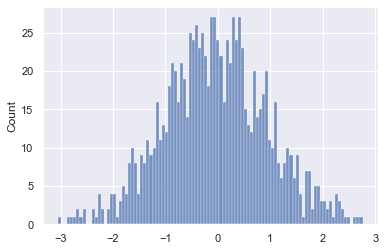

In [23]:
sns.histplot(x_rand, bins=100);

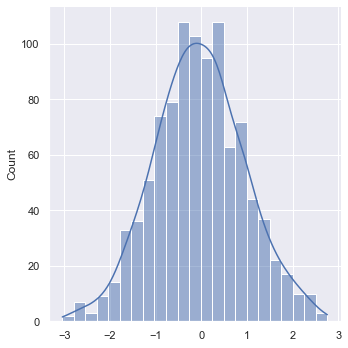

In [26]:
sns.displot(x_rand, kde=True);

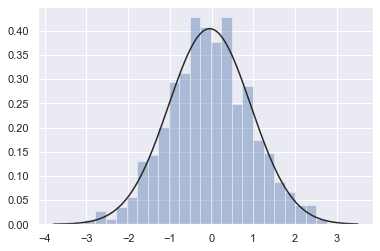

In [31]:
sns.distplot(x_rand, fit=stats.norm, kde=False);

### Distribution Fitting

In [32]:
stats.norm.fit(x_rand)

(-0.045256707490195384, 0.9870331586690257)

In [33]:
loc, scale = stats.norm.fit(x_rand)

In [34]:
loc

-0.045256707490195384

In [35]:
scale

0.9870331586690257

In [36]:
# Normally we should have 0 for the mean and 1 for the standard deviation, but since the data is not perfect
# out findings are not perfect. If we increase the sample size, we can get better results.

### Probability Density Function (PDF)

In [38]:
# PDF represents the relative likelihood that the variable takes a specific value.
# Values with a higher PDF are more likely to happen.

In [66]:
# Linearly spaced values of x
x = np.linspace(start=-5, stop=5, num=100)

In [67]:
# pdf
pdf = stats.norm.pdf(x, loc=loc, scale=scale)

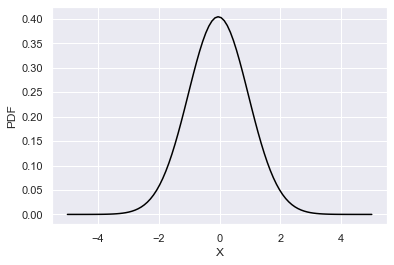

In [68]:
# plot
plt.plot(x, pdf, color='black')
plt.xlabel('X')
plt.ylabel('PDF');

### Cumulative Distribution Function (CDF)

In [46]:
# cdf
cdf = stats.norm.cdf(x, loc=loc, scale=scale)

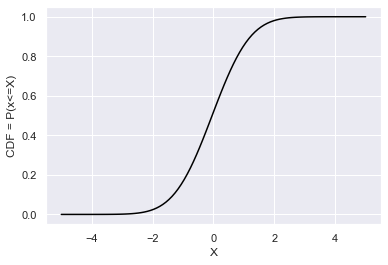

In [50]:
# plot
plt.plot(x, cdf, color='black')
plt.xlabel('X')
plt.ylabel('CDF = P(x<=X)');

### Percent Point Function (PPF)

In [48]:
# Linearly spaced values of CDF
cdf_ = np.linspace(start=0, stop=1, num=10000)

In [49]:
x_ = stats.norm.ppf(cdf_, loc=loc, scale=scale)

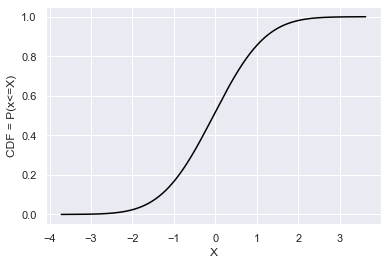

In [51]:
# plot
plt.plot(x_, cdf_, color='black')
plt.xlabel('X')
plt.ylabel('CDF = P(x<=X)');

### Use of CDF

In [52]:
# the probability that the variable X takes values lower than 1
cdf_1 = stats.norm.cdf(1, loc=loc, scale=scale)
cdf_1

0.8551974783788131

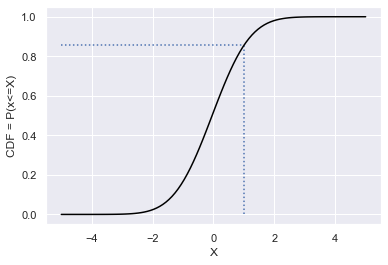

In [58]:
# plot
plt.plot(x, cdf, color='black')
plt.vlines(1, 0, cdf_1, linestyle=':')
plt.hlines(cdf_1, -5, 1, linestyle=':')
plt.xlabel('X')
plt.ylabel('CDF = P(x<=X)');
# This distribution takes below 1 within 85.5 percent of the time

In [ ]:
# value x that is not exceeded 99% of the time

In [60]:
x_99 = stats.norm.ppf(0.99, loc=loc, scale=scale)
x_99

2.2509257827873084

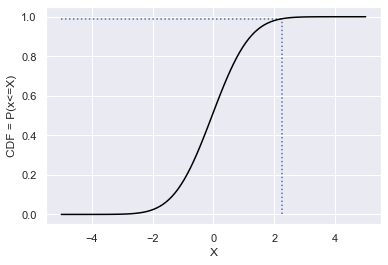

In [61]:
# plot
plt.plot(x, cdf, color='black')
plt.vlines(x_99, 0, 0.99, linestyle=':')
plt.hlines(0.99, -5, x_99, linestyle=':')
plt.xlabel('X')
plt.ylabel('CDF = P(x<=X)');
# The variable with an x value of below 2.25 will be 99 percent of the time